# Import Libraries
----------------


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

pd.options.mode.chained_assignment = None  # default='warn'

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Load Data 
-------------------

In [2]:
train = pd.DataFrame.from_csv('train.csv')
test = pd.DataFrame.from_csv('test.csv')

# Basic Analysis
-------------

### Luckily the train and test data are split nicely on 'PassengerId'=891. Lets keep this in mind for when we need to train a model on just the train data later. But for now, lets combine the test data with the train data for general exploration of the data and to apply any feature engineering or imputation of missing values all at once
* #### Bare in mind, some of the data (the test data, #892+, 418 rows), will be missing a 'Survived' value

In [3]:
train_test = pd.concat([train,test])
train_test

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742


In [4]:
train_test.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [5]:
train_test.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64


# Preliminary Engineering
---------

* ### A significant percentage of 'Age' and 'Cabin' values are missing from the test data, so to simplify for the time being, drop these columns.

* ### 'Embarked' is only missing two values, so just fill those rows with the most common value 'S'
* ### 'Fare' is missing a single value :/
* ### 'Ticket' and 'Name' do not immediately appear to contain useful data, so drop for now
--------------

In [6]:
train_test.drop(['Age','Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
train_test['Embarked'].fillna('S', inplace=True)
train_test['Fare'].fillna(30, inplace=True)
train_test.head()

,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
PassengerId,,,,,,,
1,S,7.2500,0,3,male,1,0.0
2,C,71.2833,0,1,female,1,1.0
3,S,7.9250,0,3,female,0,1.0
4,S,53.1000,0,1,female,1,1.0
5,S,8.0500,0,3,male,0,0.0


--------------
### 'Embarked' and 'Sex' are *Categorical*, so lets turn them into *Numerical* values by creating dummy feature coumns
----------------

In [7]:
embarked = pd.get_dummies(train_test['Embarked'], prefix='Embarked')
train_test = train_test.join(embarked)

In [8]:
train_test['Female'] = np.where(train_test['Sex'] == 'female', 1 ,0)

In [9]:
train_test.drop(['Sex','Embarked'], axis=1, inplace=True)
train_test.head()

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female
PassengerId,,,,,,,,,
1,7.2500,0,3,1,0.0,0,0,1,0
2,71.2833,0,1,1,1.0,1,0,0,1
3,7.9250,0,3,0,1.0,0,0,1,1
4,53.1000,0,1,1,1.0,0,0,1,1
5,8.0500,0,3,0,0.0,0,0,1,0


-------
### Preliminary Modeling
-------


In [10]:
ytrain = train['Survived']
ytrain.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [11]:
xtrain = train_test[train_test['Survived'].notnull()].drop(['Survived'], axis=1)
xtrain.head()

,Fare,Parch,Pclass,SibSp,Embarked_C,Embarked_Q,Embarked_S,Female
PassengerId,,,,,,,,
1,7.2500,0,3,1,0,0,1,0
2,71.2833,0,1,1,1,0,0,1
3,7.9250,0,3,0,0,0,1,1
4,53.1000,0,1,1,0,0,1,1
5,8.0500,0,3,0,0,0,1,0


In [12]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [13]:
IDtest = pd.Series(test.index.values, name="PassengerID")

In [14]:
xtest = train_test[train_test['Survived'].isnull()].drop(['Survived'], axis=1)
xtest.isnull().sum()

Fare          0
Parch         0
Pclass        0
SibSp         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Female        0
dtype: int64

In [15]:
testy = pd.Series(model.predict(xtest), name="Survived")
testy.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [16]:
results = pd.concat([IDtest, testy], axis=1)
results.head()

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
results.to_csv("basic.csv",index=False)

---------
## That prediction had an accuracy of 0.7512 on the official test submission. Lets see if we can improve it!
--------


### Lets look at what features the RandomForest predicted were most important
-------


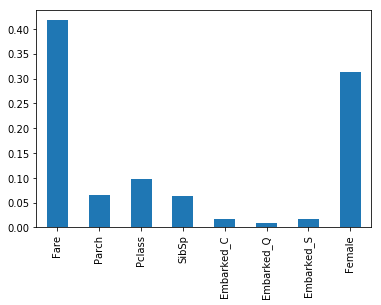

In [18]:
importances = model.feature_importances_
names=xtrain.columns.values
pd.Series(importances, index=names).plot(kind="bar")
plt.show()

### First lets add back in the columns we completely removed from the original data, while keeping the dummy features we made for 'Embarked' and 'Sex'

In [19]:
train_test

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female
PassengerId,,,,,,,,,
1,7.2500,0,3,1,0.0,0,0,1,0
2,71.2833,0,1,1,1.0,1,0,0,1
3,7.9250,0,3,0,1.0,0,0,1,1
4,53.1000,0,1,1,1.0,0,0,1,1
5,8.0500,0,3,0,0.0,0,0,1,0
6,8.4583,0,3,0,0.0,0,1,0,0
7,51.8625,0,1,0,0.0,0,0,1,0
8,21.0750,1,3,3,0.0,0,0,1,0
9,11.1333,2,3,0,1.0,0,0,1,1


In [20]:
age_cabin_name = pd.concat([train[['Age','Cabin','Name']], test[['Age','Cabin','Name']]])

In [21]:
train_test = train_test.join(age_cabin_name)

In [22]:
train_test

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name
PassengerId,,,,,,,,,,,,
1,7.2500,0,3,1,0.0,0,0,1,0,22.0,NaN,"Braund, Mr. Owen Harris"
2,71.2833,0,1,1,1.0,1,0,0,1,38.0,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,7.9250,0,3,0,1.0,0,0,1,1,26.0,NaN,"Heikkinen, Miss. Laina"
4,53.1000,0,1,1,1.0,0,0,1,1,35.0,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,8.0500,0,3,0,0.0,0,0,1,0,35.0,NaN,"Allen, Mr. William Henry"
6,8.4583,0,3,0,0.0,0,1,0,0,NaN,NaN,"Moran, Mr. James"
7,51.8625,0,1,0,0.0,0,0,1,0,54.0,E46,"McCarthy, Mr. Timothy J"
8,21.0750,1,3,3,0.0,0,0,1,0,2.0,NaN,"Palsson, Master. Gosta Leonard"
9,11.1333,2,3,0,1.0,0,0,1,1,27.0,NaN,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"


---------
# Exploratory Analysis
-----------

### Distribution of values for numerical features
------

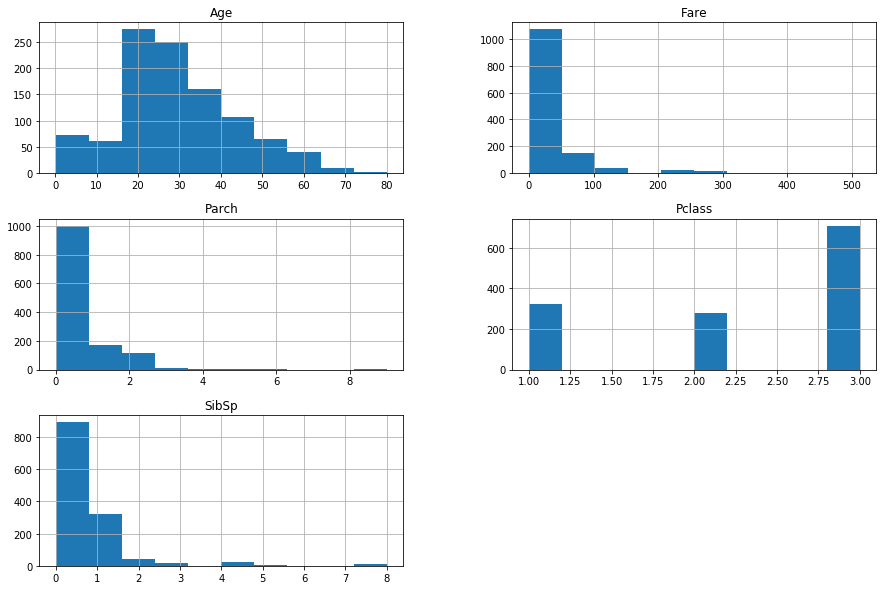

In [23]:
train_test.hist(bins=10, column=['Age','Fare','Pclass','SibSp','Parch'], figsize=(15,10))
plt.show()

### Correlation between features
-------

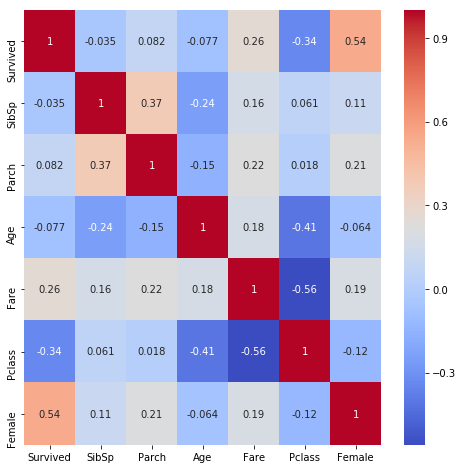

In [24]:
plt.figure(figsize=[8,8])
g = sns.heatmap(train_test[["Survived","SibSp","Parch","Age","Fare","Pclass","Female"]].corr(),annot=True, cmap = "coolwarm")
plt.show()

### Rates of survival by feature values
---------


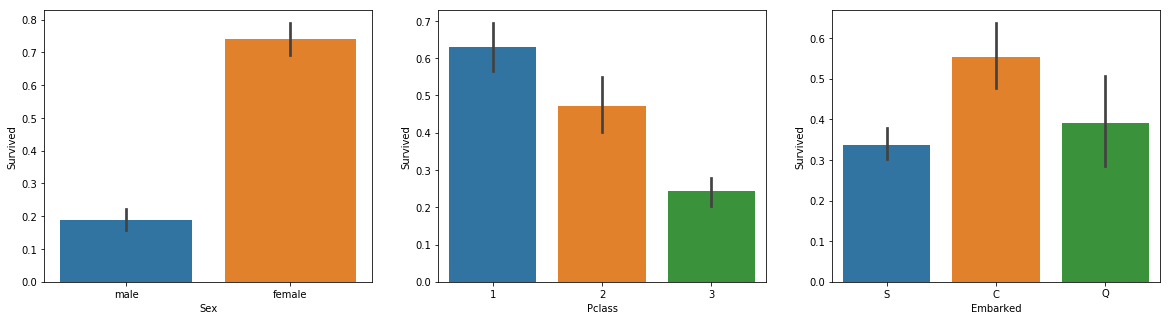

In [25]:
plt.figure(figsize=[20,5])
plt.subplot(131)
sns.barplot('Sex', 'Survived', data=train)
plt.subplot(132)
sns.barplot('Pclass', 'Survived', data=train)
plt.subplot(133)
sns.barplot('Embarked', 'Survived', data=train)
plt.show()

---------
## Including 'Age', 'Name' and 'Cabin'
---------

* ### 'Age' and 'Cabin' both suffer from a significant amount of missing values, lets think of a way to include/impute that data...
* ### Before we impute age values, lets engineer a new feature 'Title' based on the 'Name' feature, and see if there is any correlation between title and age, that may allow us to better predict/impute missing 'Age' values

In [26]:
train_test['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [27]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

train_test['Title'] = train_test['Name'].apply(get_title)

titles = pd.Series(np.unique(train_test['Title'],return_counts=True)[0])
counts = pd.Series(np.unique(train_test['Title'],return_counts=True)[1])
pd.concat([titles,counts], axis=1)

,0,1
0,Capt,1
1,Col,4
2,Countess,1
3,Don,1
4,Dona,1
5,Dr,8
6,Jonkheer,1
7,Lady,1
8,Major,2
9,Master,61


### Looks like the major titles are 'Mr','Master','Mrs','Miss'. After some research, it appears some of the other title values (e.g. 'Ms') may contain the same information as other values (e.g. 'Miss'), in this case "an unmarried woman". Since we can infer that those two superifically different titles actually confer the same basic information, lets standardize them. 

### Titles and Meanings
---------------
* #### Capt: Profession (Male)
* #### Col: Profession (Male)
* #### Countess: Nobility (Female)
* #### Don: Nobility (Male)
* #### Dr: Profession (Male)
* #### Jonkheer: Nobility (Male)
* #### Lady: Nobility (Female)
* #### Major: Profession (Male)	
* #### Master: Generic young (Male)
* #### Miss: Generic unmarried(Female)
* #### Mlle: Generic unmarried (Female)
* #### Mme: Generic unmarried (Female)
* #### Mr:	Generic (Male)
* #### Mrs:	Generic married (Female)
* #### Ms: Geneirc unmarried (Female)
* #### Rev:	Profession (Male)
* #### Sir: Nobility (Male)

In [28]:
train_test['Title'] = train_test['Title'].replace(['Mme', 'Mlle','Ms'], 'Miss')
train_test['Title'] = train_test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Distinguished')

In [29]:
titles = pd.Series(np.unique(train_test['Title'],return_counts=True)[0])
counts = pd.Series(np.unique(train_test['Title'],return_counts=True)[1])
pd.concat([titles,counts], axis=1)

,0,1
0,Distinguished,29
1,Master,61
2,Miss,265
3,Mr,757
4,Mrs,197


### Lets make dummy features for the Title categorical values

In [30]:
titles = pd.get_dummies(train_test['Title'])
train_test = train_test.join(titles)
train_test.head()

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
1,7.2500,0,3,1,0.0,0,0,1,0,22.0,NaN,"Braund, Mr. Owen Harris",Mr,0,0,0,1,0
2,71.2833,0,1,1,1.0,1,0,0,1,38.0,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,0,0,0,0,1
3,7.9250,0,3,0,1.0,0,0,1,1,26.0,NaN,"Heikkinen, Miss. Laina",Miss,0,0,1,0,0
4,53.1000,0,1,1,1.0,0,0,1,1,35.0,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,0,0,0,0,1
5,8.0500,0,3,0,0.0,0,0,1,0,35.0,NaN,"Allen, Mr. William Henry",Mr,0,0,0,1,0


In [31]:
train_test

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
1,7.2500,0,3,1,0.0,0,0,1,0,22.0,NaN,"Braund, Mr. Owen Harris",Mr,0,0,0,1,0
2,71.2833,0,1,1,1.0,1,0,0,1,38.0,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,0,0,0,0,1
3,7.9250,0,3,0,1.0,0,0,1,1,26.0,NaN,"Heikkinen, Miss. Laina",Miss,0,0,1,0,0
4,53.1000,0,1,1,1.0,0,0,1,1,35.0,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,0,0,0,0,1
5,8.0500,0,3,0,0.0,0,0,1,0,35.0,NaN,"Allen, Mr. William Henry",Mr,0,0,0,1,0
6,8.4583,0,3,0,0.0,0,1,0,0,NaN,NaN,"Moran, Mr. James",Mr,0,0,0,1,0
7,51.8625,0,1,0,0.0,0,0,1,0,54.0,E46,"McCarthy, Mr. Timothy J",Mr,0,0,0,1,0
8,21.0750,1,3,3,0.0,0,0,1,0,2.0,NaN,"Palsson, Master. Gosta Leonard",Master,0,1,0,0,0
9,11.1333,2,3,0,1.0,0,0,1,1,27.0,NaN,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs,0,0,0,0,1


### Lets see if there is any difference in avergae Age for those titles

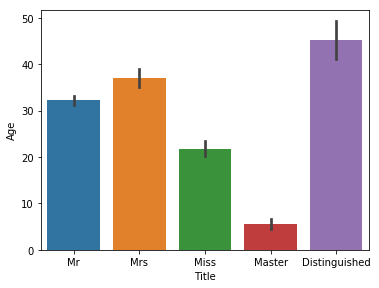

In [32]:
plt.figure(figsize=[20,15])
plt.subplot(331)
sns.barplot('Title', 'Age', data=train_test)
plt.show()

### Sure enough, we see a significant difference in avergae age based on title. Especially for Mrs vs Miss, and Mr vs Master. Distinguished titles are, as expected, associated with a higher Age

* ### From our correlation map we can see that 'Age' is correlated to some degree with 'PClass' and 'SibSp'
* ### We can observe a difference in 'mean' age by 'PClass'and 'Sibsp' by plotting the variables against each other

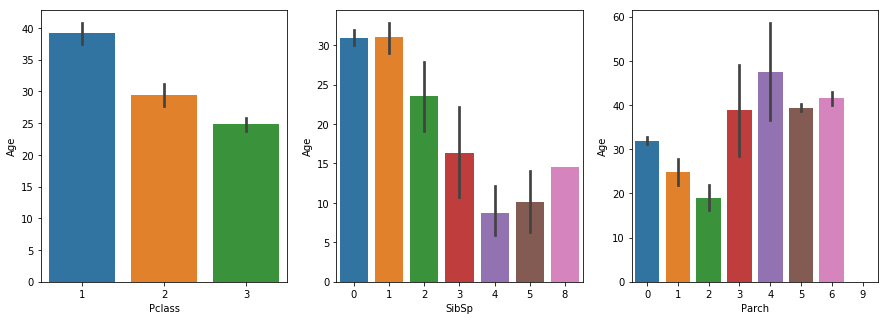

In [33]:
plt.figure(figsize=[15,5])
plt.subplot(131)
sns.barplot('Pclass', 'Age', data=train_test)
plt.subplot(132)
sns.barplot('SibSp', 'Age', data=train_test)
plt.subplot(133)
sns.barplot('Parch', 'Age', data=train_test)
plt.show()

### With these apparent differences in age based on the above factors, we should be able to better predict missing age values. We can use other variables/features for that passenger to predict their likely age.


In [34]:
age_missing = train_test[train_test['Age'].isnull()]
train_test = train_test[train_test['Age'].notnull()]
age_missing

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
6,8.4583,0,3,0,0.0,0,1,0,0,NaN,NaN,"Moran, Mr. James",Mr,0,0,0,1,0
18,13.0000,0,2,0,1.0,0,0,1,0,NaN,NaN,"Williams, Mr. Charles Eugene",Mr,0,0,0,1,0
20,7.2250,0,3,0,1.0,1,0,0,1,NaN,NaN,"Masselmani, Mrs. Fatima",Mrs,0,0,0,0,1
27,7.2250,0,3,0,0.0,1,0,0,0,NaN,NaN,"Emir, Mr. Farred Chehab",Mr,0,0,0,1,0
29,7.8792,0,3,0,1.0,0,1,0,1,NaN,NaN,"O'Dwyer, Miss. Ellen ""Nellie""",Miss,0,0,1,0,0
30,7.8958,0,3,0,0.0,0,0,1,0,NaN,NaN,"Todoroff, Mr. Lalio",Mr,0,0,0,1,0
32,146.5208,0,1,1,1.0,1,0,0,1,NaN,B78,"Spencer, Mrs. William Augustus (Marie Eugenie)",Mrs,0,0,0,0,1
33,7.7500,0,3,0,1.0,0,1,0,1,NaN,NaN,"Glynn, Miss. Mary Agatha",Miss,0,0,1,0,0
37,7.2292,0,3,0,1.0,1,0,0,0,NaN,NaN,"Mamee, Mr. Hanna",Mr,0,0,0,1,0


### Lets temporarily split off the entries with missing age values from the larger data set so we can fill in those values.

### Since 'Master' was so predictive of a younger age, set all missing Master ages to the mean for Master

In [35]:
age_missing.loc[age_missing['Master']== 1, "Age"]=train_test.loc[train_test['Master']==1, "Age"].mean()
age_missing.loc[age_missing['Master']== 1]

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
66,15.2458,1,3,1,1.0,1,0,0,0,5.482642,NaN,"Moubarek, Master. Gerios",Master,0,1,0,0,0
160,69.5500,2,3,8,0.0,0,0,1,0,5.482642,NaN,"Sage, Master. Thomas Henry",Master,0,1,0,0,0
177,25.4667,1,3,3,0.0,0,0,1,0,5.482642,NaN,"Lefebre, Master. Henry Forbes",Master,0,1,0,0,0
710,15.2458,1,3,1,1.0,1,0,0,0,5.482642,NaN,"Moubarek, Master. Halim Gonios (""William George"")",Master,0,1,0,0,0
1136,23.4500,2,3,1,NaN,0,0,1,0,5.482642,NaN,"Johnston, Master. William Arthur Willie""""",Master,0,1,0,0,0
1231,7.2292,0,3,0,NaN,1,0,0,0,5.482642,NaN,"Betros, Master. Seman",Master,0,1,0,0,0
1236,14.5000,1,3,1,NaN,0,0,1,0,5.482642,NaN,"van Billiard, Master. James William",Master,0,1,0,0,0
1309,22.3583,1,3,1,NaN,1,0,0,0,5.482642,NaN,"Peter, Master. Michael J",Master,0,1,0,0,0


### Lets look at the distribution of Titles for missing ages

In [36]:
titles = pd.Series(np.unique(age_missing['Title'],return_counts=True)[0])
counts = pd.Series(np.unique(age_missing['Title'],return_counts=True)[1])
pd.concat([titles,counts], axis=1)

,0,1
0,Distinguished,1
1,Master,8
2,Miss,51
3,Mr,176
4,Mrs,27


### Lets fill ages for Distinguished using the same method as we did for Master, since there are only a few missing values

In [37]:
age_missing.loc[age_missing['Distinguished']== 1, "Age"]=train_test.loc[train_test['Distinguished']==1, "Age"].mean()
age_missing.loc[age_missing['Distinguished']== 1]

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
767,39.6,0,1,0,0.0,1,0,0,0,45.178571,NaN,"Brewe, Dr. Arthur Jackson",Distinguished,1,0,0,0,0


### Before we fill the rest of the missing ages using the same method, lets see if we can spot any meaningful patterns in the distrubtion of ages for each specific title vs the the other important features

In [38]:
mr = train_test.loc[train_test['Mr']== 1]
miss = train_test.loc[train_test['Miss']== 1]
mrs = train_test.loc[train_test['Mrs']== 1]

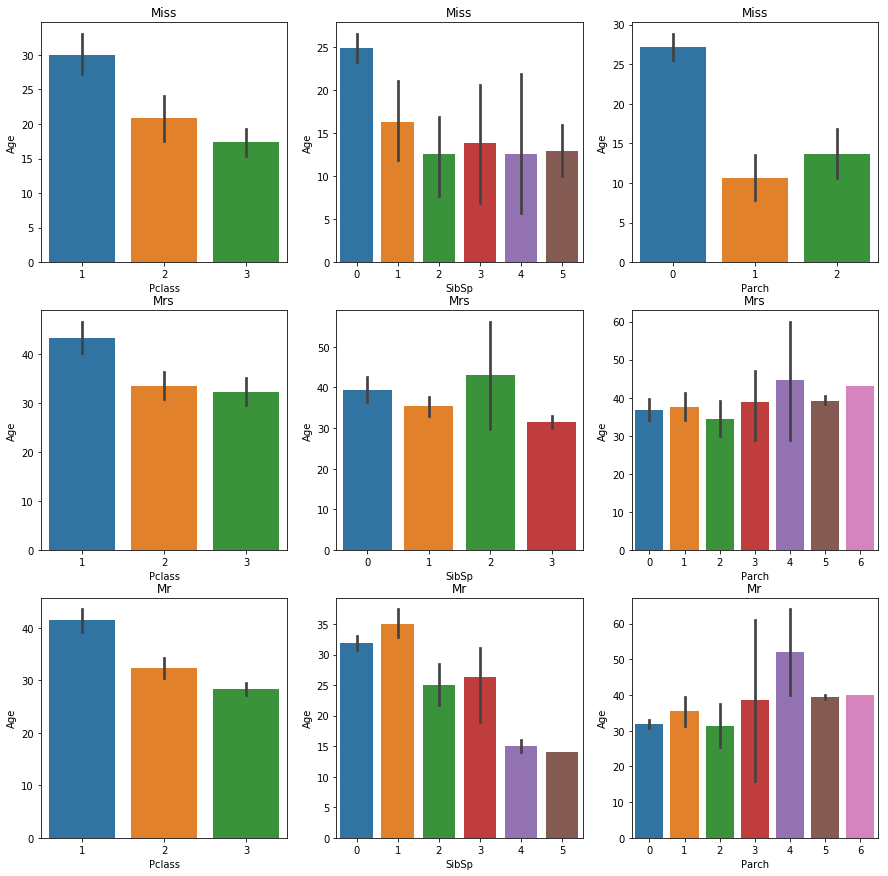

In [39]:
fig = plt.figure(figsize=[15,15])

ax1 = fig.add_subplot(331)
sns.barplot('Pclass', 'Age', data=miss)
ax1.set_title("Miss")

ax2 = fig.add_subplot(332)
sns.barplot('SibSp', 'Age', data=miss)
ax2.set_title("Miss")

ax3 = fig.add_subplot(333)
sns.barplot('Parch', 'Age', data=miss)
ax3.set_title("Miss")

ax4 = fig.add_subplot(334)
sns.barplot('Pclass', 'Age', data=mrs)
ax4.set_title("Mrs")

ax5 = fig.add_subplot(335)
sns.barplot('SibSp', 'Age', data=mrs)
ax5.set_title("Mrs")

ax6 = fig.add_subplot(336)
sns.barplot('Parch', 'Age', data=mrs)
ax6.set_title("Mrs")

ax7 = fig.add_subplot(337)
sns.barplot('Pclass', 'Age', data=mr)
ax7.set_title("Mr")

ax8 = fig.add_subplot(338)
sns.barplot('SibSp', 'Age', data=mr)
ax8.set_title("Mr")

ax9 = fig.add_subplot(339)
sns.barplot('Parch', 'Age', data=mr)
ax9.set_title("Mr")

plt.show()

### For 'Ms' there appears to be a strong pattern for the associated 'Parch' value. For 'Parch' = 0, Miss tended to be much older.
* #### Reflecting on this intuitively, this makes sense. 'Parch' specifies the number of parents + children
* #### In that era, it would be extremely unusual for a 'Miss' (unmarried) to have any kids, so we can reasonably assume that 'Parch' in the case of 'Miss', more simply represents the number of "Parents" there were traveling with
* #### In this case, the pattern represents that a 'Miss' traveling with parents ('Parch'>0) tended to be younger than a 'Miss' that was traveling alone (Parch=0)

### For 'Mrs' there is not much variation between associated features. As such, we can probably get away with just using a simple average of all 'Mrs' ages we do have


### For 'Mr' the strongest pattern appears to be with its associated 'SibSp' feature
* #### 'SibSp' specifies the number of siblings + spouses
* #### In that era (and now) it is customary for a Mr to have 0 or 1 spouses, so for 'SibSp'>1 we can assume that means they were travling with 1 or more siblings.
* #### Whether a man was traveling with a sibling seems like a reasonably important feature and a point to split the distribution on

### Set all 'Misses' with 'Parch'=0 to the average for that exact group in the train data

In [40]:
age_missing.loc[(age_missing['Miss']== 1) & (age_missing['Parch']== 0), "Age"]=train_test.loc[(train_test['Miss']== 1) & (train_test['Parch']== 0), "Age"].mean()
age_missing.loc[(age_missing['Miss']== 1) & (age_missing['Parch']== 0)].head()

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
29,7.8792,0,3,0,1.0,0,1,0,1,27.152174,NaN,"O'Dwyer, Miss. Ellen ""Nellie""",Miss,0,0,1,0,0
33,7.7500,0,3,0,1.0,0,1,0,1,27.152174,NaN,"Glynn, Miss. Mary Agatha",Miss,0,0,1,0,0
48,7.7500,0,3,0,1.0,0,1,0,1,27.152174,NaN,"O'Driscoll, Miss. Bridget",Miss,0,0,1,0,0
83,7.7875,0,3,0,1.0,0,1,0,1,27.152174,NaN,"McDermott, Miss. Brigdet Delia",Miss,0,0,1,0,0
110,24.1500,0,3,1,1.0,0,1,0,1,27.152174,NaN,"Moran, Miss. Bertha",Miss,0,0,1,0,0


### Set All 'Misses' with 'Parch'>0 to the average for that group

In [41]:
age_missing.loc[(age_missing['Miss']== 1) & (age_missing['Parch']>0), "Age"]=train_test.loc[(train_test['Miss']== 1) & (train_test['Parch']> 0), "Age"].mean()
age_missing.loc[(age_missing['Miss']== 1) & (age_missing['Parch']>0)].head()

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
129,22.3583,1,3,1,1.0,1,0,0,1,12.178816,F E69,"Peter, Miss. Anna",Miss,0,0,1,0,0
181,69.5500,2,3,8,0.0,0,0,1,1,12.178816,NaN,"Sage, Miss. Constance Gladys",Miss,0,0,1,0,0
230,25.4667,1,3,3,0.0,0,0,1,1,12.178816,NaN,"Lefebre, Miss. Mathilde",Miss,0,0,1,0,0
410,25.4667,1,3,3,0.0,0,0,1,1,12.178816,NaN,"Lefebre, Miss. Ida",Miss,0,0,1,0,0
486,25.4667,1,3,3,0.0,0,0,1,1,12.178816,NaN,"Lefebre, Miss. Jeannie",Miss,0,0,1,0,0


### Set all 'Mrs' to avergae for 'Mrs' in training data

In [42]:
age_missing.loc[(age_missing['Mrs']== 1) , "Age"]=train_test.loc[(train_test['Mrs']== 1), "Age"].mean()
age_missing.loc[(age_missing['Mrs']== 1)].head()

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
20,7.2250,0,3,0,1.0,1,0,0,1,36.994118,NaN,"Masselmani, Mrs. Fatima",Mrs,0,0,0,0,1
32,146.5208,0,1,1,1.0,1,0,0,1,36.994118,B78,"Spencer, Mrs. William Augustus (Marie Eugenie)",Mrs,0,0,0,0,1
141,15.2458,2,3,0,0.0,1,0,0,1,36.994118,NaN,"Boulos, Mrs. Joseph (Sultana)",Mrs,0,0,0,0,1
167,55.0000,1,1,0,1.0,0,0,1,1,36.994118,E33,"Chibnall, Mrs. (Edith Martha Bowerman)",Mrs,0,0,0,0,1
187,15.5000,0,3,1,1.0,0,1,0,1,36.994118,NaN,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",Mrs,0,0,0,0,1


### Set all 'Mr' with 'SibSp'>1 to its respective average, and 'SibSp' <2 to its average

In [43]:
age_missing.loc[(age_missing['Mr']== 1) & (age_missing['SibSp']> 1), "Age"]=train_test.loc[(train_test['Mr']== 1) & (train_test['SibSp']> 1), "Age"].mean()
age_missing.loc[(age_missing['Mr']== 1) & (age_missing['SibSp']>1)].head()

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
49,21.6792,0,3,2,0.0,1,0,0,0,23.666667,NaN,"Samaan, Mr. Youssef",Mr,0,0,0,1,0
202,69.5500,2,3,8,0.0,0,0,1,0,23.666667,NaN,"Sage, Mr. Frederick",Mr,0,0,0,1,0
302,23.2500,0,3,2,1.0,0,1,0,0,23.666667,NaN,"McCoy, Mr. Bernard",Mr,0,0,0,1,0
325,69.5500,2,3,8,0.0,0,0,1,0,23.666667,NaN,"Sage, Mr. George John Jr",Mr,0,0,0,1,0
847,69.5500,2,3,8,0.0,0,0,1,0,23.666667,NaN,"Sage, Mr. Douglas Bullen",Mr,0,0,0,1,0


In [44]:
age_missing.loc[(age_missing['Mr']== 1) & (age_missing['SibSp']< 2), "Age"]=train_test.loc[(train_test['Mr']== 1) & (train_test['SibSp']< 2), "Age"].mean()
age_missing.loc[(age_missing['Mr']== 1) & (age_missing['SibSp']<2)].head()

,Fare,Parch,Pclass,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Female,Age,Cabin,Name,Title,Distinguished,Master,Miss,Mr,Mrs
PassengerId,,,,,,,,,,,,,,,,,,
6,8.4583,0,3,0,0.0,0,1,0,0,32.574107,NaN,"Moran, Mr. James",Mr,0,0,0,1,0
18,13.0000,0,2,0,1.0,0,0,1,0,32.574107,NaN,"Williams, Mr. Charles Eugene",Mr,0,0,0,1,0
27,7.2250,0,3,0,0.0,1,0,0,0,32.574107,NaN,"Emir, Mr. Farred Chehab",Mr,0,0,0,1,0
30,7.8958,0,3,0,0.0,0,0,1,0,32.574107,NaN,"Todoroff, Mr. Lalio",Mr,0,0,0,1,0
37,7.2292,0,3,0,1.0,1,0,0,0,32.574107,NaN,"Mamee, Mr. Hanna",Mr,0,0,0,1,0


### Lets add these imputed 'Age' values back to our main data set

In [45]:
train_test = pd.concat([train_test, age_missing])

In [46]:
train_test.drop(['Name','Title','Distinguished','Master','Mr','Miss','Mrs','Cabin'], axis=1, inplace=True)

### Now lets test what impact adding 'Ages' in had on our accuracy
----------------------------

In [47]:
ytrain = train_test[train_test['Survived'].notnull()]
ytrain = ytrain['Survived']
xtrain = train_test[train_test['Survived'].notnull()].drop(['Survived'], axis=1)

In [48]:
model = RandomForestClassifier(n_estimators=100)
model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [49]:
xtest = train_test[train_test['Survived'].isnull()].drop(['Survived'], axis=1)

In [50]:
IDtest = pd.Series(xtest.index.values, name="PassengerId")

In [51]:
testy = pd.Series(model.predict(xtest).astype(int), name="Survived")

In [52]:
results = pd.concat([IDtest, testy], axis=1)
results.to_csv("basic_age.csv",index=False)

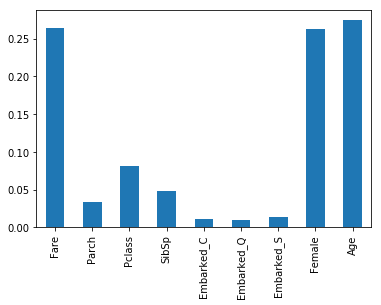

In [53]:
importances = model.feature_importances_
names=xtrain.columns.values
pd.Series(importances, index=names).plot(kind="bar")
plt.show()